In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
func = lambda x: 4*np.sin(3*x) - 3*np.cos(7*x)

In [10]:
def update_temperature(T):
    return T - 0.0001

def make_move(x, T):
    nhb = 50*np.random.random()
    dE = func(nhb) - func(x)
    return nhb if np.random.random() < np.fmin(np.exp(-dE/T), 1) else x

def simulated_annealing():
    x_best = x = x0 = 50*np.random.random()
    T = T0 = 10.
    k = 1
    
    x_trace = [x_best]
    while T > 1e-3:
        x = make_move(x, T)
        if(func(x) < func(x_best)):
            x_best = x
        x_trace.append(x_best)
        T = update_temperature(T)
        k += 1
        
    return np.array(x_trace)

In [11]:
x_trace = simulated_annealing()

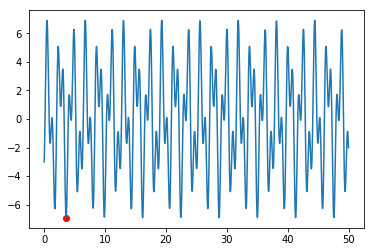

In [13]:
X = np.linspace(0, 50, 1000)
y = func(X)
plt.scatter(x_trace[-1], func(x_trace[-1]), c='red')
plt.plot(X, y)
plt.show()

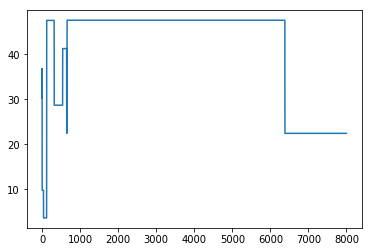

In [17]:
plt.plot(x_trace[:8000])
plt.show()

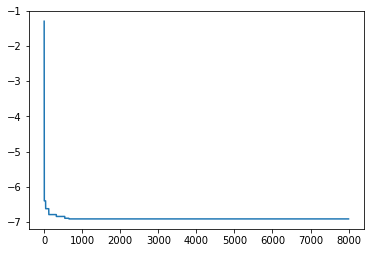

In [18]:
plt.plot(func(x_trace[:8000]))
plt.show()